<a href="https://colab.research.google.com/github/GabrielaSVanzelli/Data-Science/blob/main/Analisando_dados_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Data Analysis - Vancouver, British Columbia, Canada**

Airbnb is already considered the largest hotel company today. And the detail is that he doesn't own any hotel!!!

Conveniently connecting people who want to travel (and stay) with hosts who want to rent their properties, Airbnb provides an innovative platform to make this hosting alternative.

By the end of 2018, the Startup (founded 10 years ago) had already hosted more than 300 million people around the world, challenging traditional hotel chains.

<center><img alt="Analisando Airbnb" width="90%" src="https://raw.githubusercontent.com/GabrielaSVanzelli/images/main/beautiful-shot-of-the-boats-parked-near-the-coal-harbour-in-vancouver.jpg"></center>

Airbnb makes website data available for some of the world's major cities through the portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

  On the website, it is possible to download a large amount of data to develop *Data Science* projects and solutions.

---

**In this notebook, we will analyze data for the city of Vancouver, located in the province of British Columbia, Canada, and see what insights can be extracted from the raw data.**


#### **Obtaining the Data**

All data used here was obtained from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

For this initial exploratory analysis, only the following file will be downloaded:

* `listings.csv` - Summary information and metrics for listings in Vancouver (good for visualisations).

Important: The portal is constantly evolving, and at some point, the exact [dataset](http://data.insideairbnb.com/canada/bc/vancouver/2022-01-09/visualisations/listings.csv) used in this notebook may no longer be available, which would break our code.

With that in mind, we provide [here](https://www.dropbox.com/s/0ss5mv8oebq767j/listings.csv?dl=0) the set we use, so that you can always use this material.

*With that in mind, let's get to the project.*


In [ ]:
# import the necessary library (libs)
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [ ]:
# import the listings.csv file for a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2022-01-09/visualisations/listings.csv')

## **Data Analysis**

This step aims to create an awareness of the initial situation and allow an understanding of how the data are structured.

**Dictionary of dataset variables**

* `id` - Airbnb's unique identifier for the listing
* `name` - Advertised property name
* `host_id` - Airbnb's unique identifier for the host/user 
* `host_name` - Host name
* `neighbourhood_group` - This column does not contain any valid values
* `neighborhood` - Neighborhood name
* `lalitude` - Coordinate of the property's latitude
* `longitude` - Coordinate of the property's longitude
* `room_type` - Informs the type of room that is offered
* `price` - Price to rent the property
* `minimum_nights` - Minimum amount of nights to book
* `number_of_reviews` - Number of reviews the property has
* `last_review` - Date of the last review
* `reviews_per_month` - Number of reviews per month
* `calculated_host_listing_count` - Number of properties from the same host
* `availability_365` - Number of days of availability within 365 days
* `number_of_reviews_ltm` - The number of reviews the listing has (in the last 12  months)
* `licence` - The license/permit/registration number 

Before starting any analysis, let's check the face of our *dataset*, analyzing the first 5 inputs.

In [ ]:
# show first five inputs
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28872,-123.12046,Entire home/apt,158,90,16,2017-02-26,0.13,40,4,0,18-476608
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24773,-123.10509,Entire home/apt,150,2,256,2022-01-01,1.77,1,180,9,22-156193
2,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28201,-123.12669,Entire home/apt,85,30,432,2021-12-24,3.07,1,29,2,18-611603
3,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25622,-123.06607,Entire home/apt,150,30,92,2021-12-14,0.71,1,251,4,NaN
4,14267,EcoLoft Vancouver,56030,Peter & Alison,NaN,Kensington-Cedar Cottage,49.24922,-123.08139,Entire home/apt,150,3,34,2021-07-14,0.25,1,43,1,21-156500


#### Q1. How many variables (columns) and how many entries (rows) does our file have?

Let's go ahead and identify how many entries our dataset has and see the types of each column.

This dataset we downloaded is the "abridged" version of Airbnb. On the same page we downloaded the listings.csv file, there is a more complete version with more entries and more variables (listings.csv.gz).

In [ ]:
#identify the DataFrame data shape
print('Rows: \t {}'.format(df.shape[0]))
print('Columns:\t {}\n'.format(df.shape[1]))

display(df.dtypes)

Rows: 	 4546
Columns:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#### Q2. What is the percentage of missing values in the dataset?

The quality of a dataset is related to the amount of missing values. It is important to understand early on whether these null values are significant compared to the total entries.

* The variables `neighbourhood_group`, `"license"`, `reviews_per_month`, "last_review" and `host_name`, are the only variables that have missing values.
* You can see that the `neighborhood_group` column has 100% of its values missing.
* The `host_name` variable has less than 1% of its values missing.

In [ ]:
# sort variables in descending order by their missing values
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            29.630444
reviews_per_month                  15.992081
last_review                        15.992081
host_name                           0.153982
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

#### Q3. What is the type of distribution of the variables?
To identify the distribution of variables, I will plot the histogram

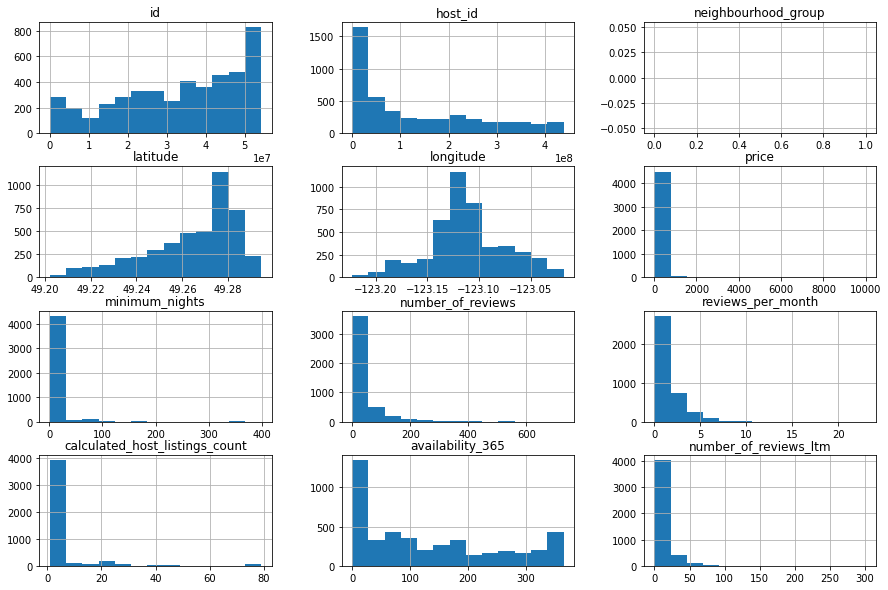

In [ ]:
# plot the histogram of numeric variables
df.hist(bins=13, figsize=(15,10));

#### Q4. Are there outliers present?

By the distribution of the histogram, it is possible to verify evidence of the presence of outliers. Take for example the variables `price`, `minimum_nights` and `calculated_host_listings_count`.

The values do not follow a distribution, and they distort the entire graphical representation. To confirm, there are two quick ways that help detect outliers. They are:

Statistical summary through the method `describe()`

Plot `boxplots` for the variable.

In [ ]:
# See the statistical summary of numerical variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4546.000000,4546.000000,4546.000000,3819.000000,4546.000000,4546.000000
mean,176.265728,18.203256,36.154201,1.376942,5.458425,130.283766
std,289.505120,33.030600,62.737417,1.525082,12.496729,122.313264
min,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,91.000000,2.000000,2.000000,0.270000,1.000000,7.000000
50%,126.000000,4.000000,10.000000,0.830000,1.000000,90.000000
75%,193.000000,30.000000,42.000000,2.000000,3.000000,226.000000
max,9999.000000,399.000000,728.000000,23.000000,79.000000,365.000000


Looking at the statistical summary above, we can confirm some hypotheses such as:

* The variable (price) has 75% of the value below 193, but its maximum value is 4546.
* The minimum number of nights (minimum_nights) is above 365 days in the year.

**Boxplot for `minimum_nights`**

minimum_nights:valores acima de 30:
333 entradas
7.3251%


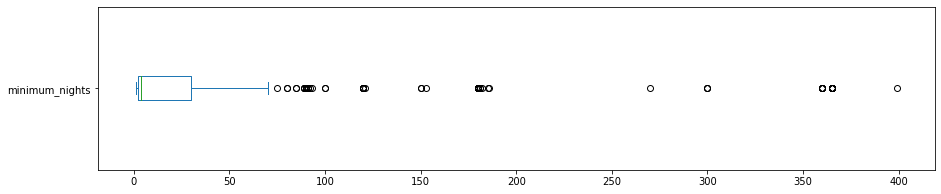

In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));

# see amount of values over 30 days to 'minimum_nights'
print('minimum_nights:valores acima de 30:')
print('{} entradas'.format((len(df[df.minimum_nights > 30]))))
print('{:.4f}%'.format ((len(df[df.minimum_nights > 30]) / df.shape[0]) *100))

**Boxplot for `price`**

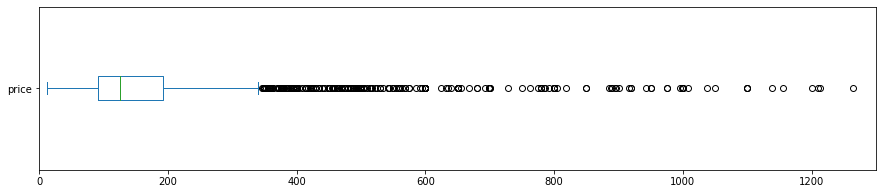


 price: valores acima de 1500
17 entradas
0.3740%


In [ ]:
# price 
df.price.plot(kind='box', vert=False, xlim=(0, 1300), figsize=(15, 3),)
plt.show()

# See amount of values above 1500 for price
print('\n price: valores acima de 1500')
print('{} entradas'.format(len(df[df.price > 1500])))
print('{:.4f}%'. format((len(df[df.price > 1500]) / df.shape[0]) *100))

#df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histograma without outlier 

As we have already identified outliers in the `price` and `minimum_nights` variables, let's now clear the DataFrame of them and re-plot the histogram.

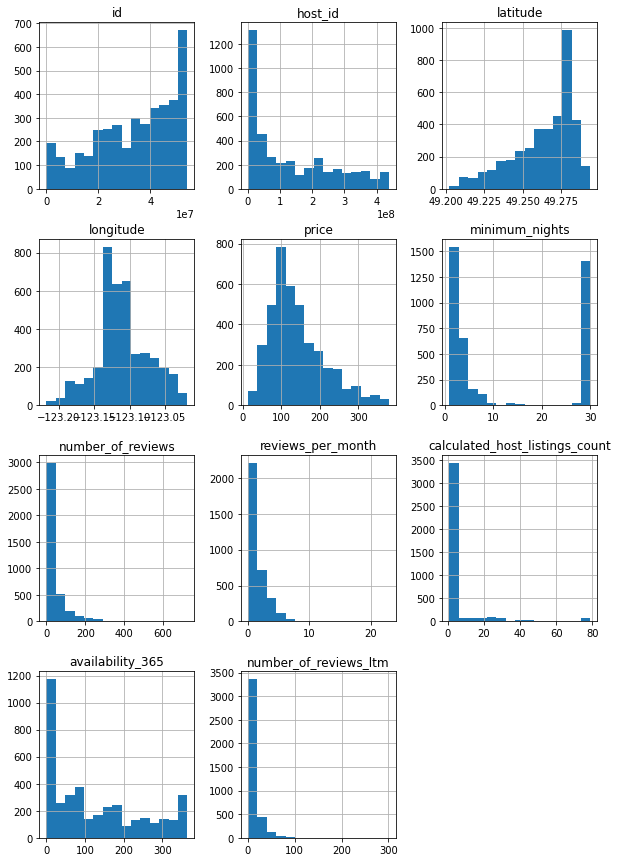

In [ ]:
# Remove the 'outliers' on a new dataframe 
# Using the code 'copy()', any modification in the new list won’t be reflected in the original list
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 380]. index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remove 'neighborhood_group' it's empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Plot the histogram for numeric variables
df_clean.hist(bins=15, figsize=(10, 15));


#### **Q4. What is the correlation between the variables?**

Correlation means that there is a relationship between two things. In our context, we are looking for a relationship or similarity between two variables.

This relationship can be measured, and it is the function of the correlation coefficient to establish the strength of this relationship. To identify the correlations between the variables of interest, let's:

* Create a correlation matrix
* Generate a heatmap from this array, using the seaborn library



In [ ]:
# Create a correlation matrix 
correlation = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(correlation)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.114520,-0.062796,-0.007235,-0.061841,0.140689
minimum_nights,-0.114520,1.000000,-0.234262,-0.389572,0.308904,0.183891
number_of_reviews,-0.062796,-0.234262,1.000000,0.571929,-0.164966,0.028416
reviews_per_month,-0.007235,-0.389572,0.571929,1.000000,-0.169429,0.058348
calculated_host_listings_count,-0.061841,0.308904,-0.164966,-0.169429,1.000000,0.031274
availability_365,0.140689,0.183891,0.028416,0.058348,0.031274,1.000000


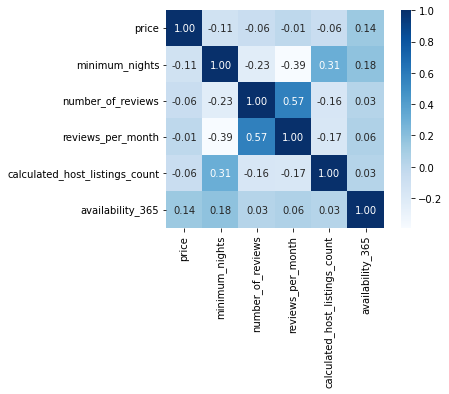

In [ ]:
sns.heatmap(correlation, cmap='Blues', fmt='.2f', square=True, linecolor='white', annot=True);

#### **Q5. What is the most rented property type in Airbnb?**

The room_type variable column indicates the type of rental that is advertised on Airbnb. If you have already rented on the site, you know that there are options for apartments/whole houses, just renting a room or even sharing a room with other people.

Let's count the number of occurrences of each rental type, using the `value_counts()` method.

In [ ]:
# Show the amount of each property type availble
df_clean.room_type.value_counts()

Entire home/apt    3184
Private room        771
Shared room           8
Hotel room            5
Name: room_type, dtype: int64

In [ ]:
# Show the percentage of each property type available
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.802419
Private room       0.194304
Shared room        0.002016
Hotel room         0.001260
Name: room_type, dtype: float64

#### **Q6. What is the most expensive location in vancouver**

One way to check one variable against another is to use `groupby()`. In this case, we want to compare the *neighborhoods* based on the rental price.


In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
West Point Grey       163.957447
Kitsilano             163.403509
Downtown Eastside     162.712871
Strathcona            161.071429
Downtown              160.696940
Fairview              142.577586
Mount Pleasant        141.923387
Dunbar Southlands     141.666667
West End              140.030151
Grandview-Woodland    135.446701
Name: price, dtype: float64

In [ ]:
# See the amount of properties in downtown
df_clean[df_clean.neighbourhood == 'Downtown'].shape

(1013, 17)

In [ ]:
df_clean[df_clean.neighbourhood == 'Downtown']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
13,19001,Vancouver Downtown Studio Apartment,72649,Melanie,Downtown,49.27660,-123.12935,Entire home/apt,102,5,142,2021-12-16,0.98,1,70,3,18-597543
15,19621,Beautiful 2 Br 2 Bath + Den Yaletown Seawall,74380,Shirin,Downtown,49.27323,-123.12032,Entire home/apt,190,30,0,NaN,NaN,1,233,0,NaN
20,26047,The Alpha Downtown by COMFYSUITES,109845,Alicia,Downtown,49.28086,-123.12375,Entire home/apt,159,30,37,2022-01-07,0.29,4,316,3,NaN
21,32746,Designer Urban Park View Townhouse,52118,Liliana,Downtown,49.27920,-123.10500,Entire home/apt,127,30,84,2021-12-15,0.60,2,364,4,NaN
24,42645,The Charlie Downtown by COMFYSUITES,109845,Alicia,Downtown,49.28036,-123.12340,Entire home/apt,159,30,32,2021-12-16,0.23,4,216,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,54149967,Penthouse Center downtown 1 bed room,426271818,Moe,Downtown,49.28400,-123.11346,Entire home/apt,90,10,0,NaN,NaN,2,19,0,Exempt
4541,54179660,Million Dollar View New 2 Spacious Bedroom Unit!,219146817,埃,Downtown,49.28942,-123.12566,Entire home/apt,350,14,0,NaN,NaN,6,365,0,17-118282
4542,54183138,HeartDowntown Condo Modern City/Ocean/Mountain...,47283230,Gunnar,Downtown,49.28027,-123.12401,Entire home/apt,123,30,0,NaN,NaN,1,208,0,NaN
4544,54198240,Downtown Vancouver Water Views 3 bedroom 2 Bath,206979822,Rey,Downtown,49.28059,-123.10969,Entire home/apt,214,1,0,NaN,NaN,1,283,0,22-171072


As Latitudes and Longitudes are provided for properties, it is possible to plot each point. For this, it is considered `x=longitude` e `y=latitude`.

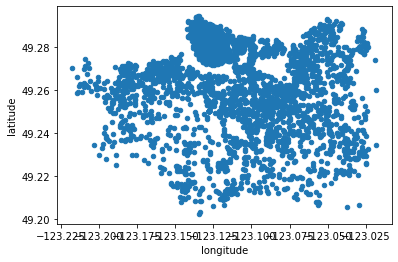

In [ ]:
# plot properties by latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', )